In [1]:
import yaml

from torchrl.envs.utils import check_env_specs

from config import TrainingConfig, LossConfig, AgentNNConfig, BackboneConfig, HeadConfig, EnvConfig
from algorithms.simple_nn import TrainableNNAgentPolicy
from algorithms.generic_policy import MultiAgentPolicy
from algorithms.generator import AgentGenerator
from algorithms.keys_processors import CombinedExtractor

with open("configs/run/test_single_training_poachers.yaml", "r") as file:
    config = yaml.safe_load(file)
env_config = EnvConfig.from_dict(config)

env_map, env = env_config.create("cuda")
check_env_specs(env)

2025-07-14 16:47:18,628 [torchrl][INFO] check_env_specs succeeded!


In [2]:
training_config_defender = TrainingConfig.from_dict(config, suffix="_defender")
loss_config_defender = LossConfig.from_dict(config, suffix="_defender")
training_config_attacker = TrainingConfig.from_dict(config, suffix="_attacker")
loss_config_attacker = LossConfig.from_dict(config, suffix="_attacker")
agent_config = AgentNNConfig.from_dict(config)
backbone_config = BackboneConfig.from_dict(config, suffix="_backbone")
head_config = HeadConfig.from_dict(config, suffix="_head")

defender_nn_extractor = CombinedExtractor(player_type=0, env=env, actions_map=backbone_config.extractors)
defender_agent_nn = TrainableNNAgentPolicy(
    player_type=0,
    max_sequence_size=env_config.num_steps + 1,
    extractor=defender_nn_extractor,
    action_size=env.action_size,
    env_type=env_config.env_pair,
    agent_config=agent_config,
    backbone_config=backbone_config,
    head_config=head_config,
    device="cuda:0",
    loss_config=loss_config_defender,
    training_config=training_config_defender,
    run_name="test",
)
defender_agent_nn.eval()
defender_agent_nn.load("saved_models/2025-07-11_02:29:43-full-/defender/agent_0.pth")

attacker_extractor_nn = CombinedExtractor(player_type=1, env=env, actions_map=backbone_config.extractors)
attacker_agent_nn = MultiAgentPolicy(
    action_size=env.action_size,
    player_type=1,
    device="cuda",
    embedding_size=agent_config.embedding_size,
    run_name="test",
    policy_generator=AgentGenerator(
        TrainableNNAgentPolicy,
        {
            "extractor": attacker_extractor_nn,
            "max_sequence_size": env_config.num_steps + 1,
            "action_size": env.action_size,
            "env_type": env_config.env_pair,
            "player_type": 1,
            "device": "cuda",
            "loss_config": loss_config_attacker,
            "training_config": training_config_attacker,
            "run_name": "test",
            "agent_config": agent_config,
            "backbone_config": backbone_config,
            "head_config": head_config,
        }
    ),
)
attacker_agent_nn.eval()
attacker_agent_nn.load("saved_models/2025-07-11_02:29:43-full-/attacker")

In [3]:
with open("configs/run/test_single_training_poachers_gnn.yaml", "r") as file:
    config = yaml.safe_load(file)
training_config_defender = TrainingConfig.from_dict(config, suffix="_defender")
loss_config_defender = LossConfig.from_dict(config, suffix="_defender")
training_config_attacker = TrainingConfig.from_dict(config, suffix="_attacker")
loss_config_attacker = LossConfig.from_dict(config, suffix="_attacker")
agent_config = AgentNNConfig.from_dict(config)
backbone_config = BackboneConfig.from_dict(config, suffix="_backbone")
head_config = HeadConfig.from_dict(config, suffix="_head")

defender_extractor_gnn = CombinedExtractor(player_type=0, env=env, actions_map=backbone_config.extractors)
defender_agent_gnn = TrainableNNAgentPolicy(
    player_type=0,
    max_sequence_size=env_config.num_steps + 1,
    extractor=defender_extractor_gnn,
    action_size=env.action_size,
    env_type=env_config.env_pair,
    device="cuda:0",
    loss_config=loss_config_defender,
    training_config=training_config_defender,
    run_name="test",
    agent_config=agent_config,
    backbone_config=backbone_config,
    head_config=head_config,
)
defender_agent_gnn.eval()
defender_agent_gnn.load("saved_models/2025-07-09_17:57:17-full-/defender/agent_0.pth")

attacker_extractor_gnn = CombinedExtractor(player_type=1, env=env, actions_map=backbone_config.extractors)
attacker_agent_gnn = MultiAgentPolicy(
    action_size=env.action_size,
    player_type=1,
    device="cuda:0",
    embedding_size=agent_config.embedding_size,
    run_name="test",
    policy_generator=AgentGenerator(
        TrainableNNAgentPolicy,
        {
            "extractor": attacker_extractor_gnn,
            "max_sequence_size": env_config.num_steps + 1,
            "action_size": env.action_size,
            "env_type": env_config.env_pair,
            "player_type": 1,
            "device": "cuda:0",
            "loss_config": loss_config_attacker,
            "training_config": training_config_attacker,
            "run_name": "test",
            "agent_config": agent_config,
            "backbone_config": backbone_config,
            "head_config": head_config,
        }
    ),
)
attacker_agent_gnn.eval()
attacker_agent_gnn.load("saved_models/2025-07-09_17:57:17-full-/attacker")

In [4]:
with open("configs/run/test_single_training_poachers_gnn_transformer.yaml", "r") as file:
    config = yaml.safe_load(file)
training_config_defender = TrainingConfig.from_dict(config, suffix="_defender")
loss_config_defender = LossConfig.from_dict(config, suffix="_defender")
training_config_attacker = TrainingConfig.from_dict(config, suffix="_attacker")
loss_config_attacker = LossConfig.from_dict(config, suffix="_attacker")
agent_config = AgentNNConfig.from_dict(config)
backbone_config = BackboneConfig.from_dict(config, suffix="_backbone")
head_config = HeadConfig.from_dict(config, suffix="_head")

defender_extractor_gnn_transformer = CombinedExtractor(player_type=0, env=env, actions_map=backbone_config.extractors)
defender_agent_gnn_transformer = TrainableNNAgentPolicy(
    player_type=0,
    max_sequence_size=env_config.num_steps + 1,
    extractor=defender_extractor_gnn_transformer,
    action_size=env.action_size,
    env_type=env_config.env_pair,
    device="cuda:0",
    loss_config=loss_config_defender,
    training_config=training_config_defender,
    run_name="test",
    agent_config=agent_config,
    backbone_config=backbone_config,
    head_config=head_config,
)
defender_agent_gnn_transformer.eval()
defender_agent_gnn_transformer.load("saved_models/2025-07-13_01:23:08-full-/defender/agent_0.pth")

attacker_extractor_gnn_transformer = CombinedExtractor(player_type=1, env=env, actions_map=backbone_config.extractors)
attacker_agent_gnn_transformer = MultiAgentPolicy(
    action_size=env.action_size,
    player_type=1,
    device="cuda:0",
    embedding_size=agent_config.embedding_size,
    run_name="test",
    policy_generator=AgentGenerator(
        TrainableNNAgentPolicy,
        {
            "extractor": attacker_extractor_gnn_transformer,
            "max_sequence_size": env_config.num_steps + 1,
            "action_size": env.action_size,
            "env_type": env_config.env_pair,
            "player_type": 1,
            "device": "cuda:0",
            "loss_config": loss_config_attacker,
            "training_config": training_config_attacker,
            "run_name": "test",
            "agent_config": agent_config,
            "backbone_config": backbone_config,
            "head_config": head_config,
        }
    ),
)
attacker_agent_gnn_transformer.eval()
attacker_agent_gnn_transformer.load("saved_models/2025-07-13_01:23:08-full-/attacker")

In [5]:
from algorithms.coevosg import CoevoSGDefenderAgent, CoevoSGAttackerAgent, CoevoSGConfig

defender_agent_coevosg = CoevoSGDefenderAgent(
    device="cuda",
    run_name="test",
    config=CoevoSGConfig(),
    env=env,
)

attacker_agent_coevosg = CoevoSGAttackerAgent(
    device="cuda",
    run_name="test",
    config=CoevoSGConfig(),
    env=env,
)

defender_agent_coevosg.eval()
attacker_agent_coevosg.eval()
defender_agent_coevosg.load("saved_models/2025-07-12_14:11:12-full-coevosg-/defender/agent_0.pth")
attacker_agent_coevosg.load("saved_models/2025-07-12_14:11:12-full-coevosg-/attacker/agent_0.pth")

In [6]:
from algorithms.generic_policy import RandomAgent, GreedyOracleAgent, PoachersLogicModule

logic_module = PoachersLogicModule(env_map=env_map, player_type=1, total_steps=env.num_steps, device="cuda:0")
attacker_agent_random = RandomAgent(action_size=env.action_size, embedding_size=agent_config.embedding_size, player_type=1, device="cuda:0", run_name="test")
attacker_greedy_oracle = GreedyOracleAgent(
    action_size=env.action_size, total_steps=env.num_steps, embedding_size=agent_config.embedding_size, player_type=1, device="cuda:0", run_name="test", map_logic=logic_module
)

In [7]:
from utils import compare_agent_pairs

results = compare_agent_pairs(
    [
        (defender_agent_nn, attacker_agent_nn, "nn"),
        (defender_agent_gnn, attacker_agent_gnn, "gnn"),
        (defender_agent_gnn_transformer, attacker_agent_gnn_transformer, "gnn_transformer"),
        (defender_agent_coevosg, attacker_agent_coevosg, "coevosg"),
    ],
    [
        (attacker_agent_random, "random"),
        (attacker_greedy_oracle, "greedy"),
    ],
    env,
    print_results=True,
)

Defender: nn vs Attacker: nn => Defender avg reward: 0.8668 (1.2920)
Defender: nn vs Attacker: gnn => Defender avg reward: 0.8096 (1.2414)
Defender: nn vs Attacker: gnn_transformer => Defender avg reward: 0.1607 (1.3430)
Defender: nn vs Attacker: coevosg => Defender avg reward: -0.7796 (2.5757)
Defender: nn vs Attacker: random => Defender avg reward: 0.8718 (1.8670)
Defender: nn vs Attacker: greedy => Defender avg reward: -6.9195 (0.0000)
Defender: nn => Avg reward: -0.8317 (3.2045)
Defender: gnn vs Attacker: nn => Defender avg reward: 1.4008 (1.4352)
Defender: gnn vs Attacker: gnn => Defender avg reward: 2.1731 (0.9863)
Defender: gnn vs Attacker: gnn_transformer => Defender avg reward: -0.0729 (1.4089)
Defender: gnn vs Attacker: coevosg => Defender avg reward: -2.2763 (2.8456)
Defender: gnn vs Attacker: random => Defender avg reward: 0.9970 (1.7839)
Defender: gnn vs Attacker: greedy => Defender avg reward: -5.4643 (3.5706)
Defender: gnn => Avg reward: -0.5404 (3.4119)
Defender: gnn_tr

In [ ]:
results

In [52]:
# plot density of results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
def plot_density(results, titles):
    plt.figure(figsize=(10, 6))
    for result, title in zip(results, titles):
        sns.kdeplot(data=result, fill=True, label=title)
    plt.title("Comparison of reward distributions (Poachers)")
    plt.xlabel("Reward")
    plt.ylabel("Density")
    plt.legend()
    #plt.xlim(-1, 1)
    #plt.ylim(0, 5)
    plt.grid()
    plt.show()
    
def get_data(results, key):
    out = []
    for k in results:
        if k.startswith(f"{key}/") and k.endswith("/raw"):
            out.extend(results[k])
    return out

def get_data_specific(results, key1, key2):
    out = []
    for k in results:
        if k.startswith(f"{key1}/{key2}/") and k.endswith("/raw"):
            out.extend(results[k])
    return out

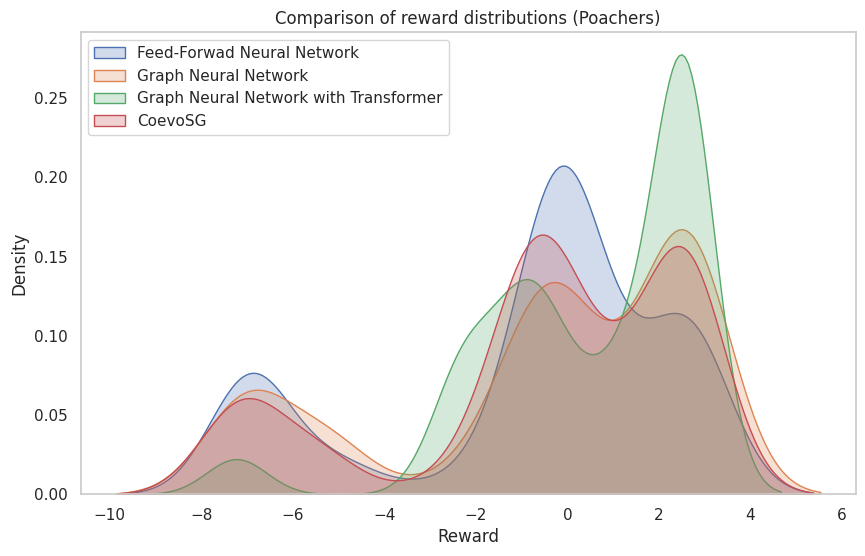

In [53]:
plot_density(
    [
        get_data(results, "nn"),
        get_data(results, "gnn"),
        get_data(results, "gnn_transformer"),
        get_data(results, "coevosg"),
    ],
    [
        "Feed-Forwad Neural Network",
        "Graph Neural Network",
        "Graph Neural Network with Transformer",
        "CoevoSG",
    ],
)

In [41]:
import numpy as np
from scipy.stats import wilcoxon

def compare_models(model1, model2, print_results=True):
    data1 = get_data(results, model1)
    data2 = get_data(results, model2)
    
    if len(data1) != len(data2):
        raise ValueError("Data lengths do not match for comparison.")
    
    stat, p_value = wilcoxon(np.array(data1) - np.array(data2), alternative="greater")
    if print_results:
        print(f"Wilcoxon test between {model1} and {model2}: statistic={stat:.3f}, p-value={p_value:.3f}")
        
        if p_value < 0.05:
            print(f"Result: {model1} is statistically significantly better than {model2}.")
        else:
            print(f"Result: {model1} is not statistically significantly better than {model2}.")
        
    return p_value
    

In [47]:
# Use Holm-Bonferroni correction for multiple comparisons
from statsmodels.stats.multitest import multipletests
def holm_bonferroni_correction(p_values):
    corrected = multipletests(p_values, method='holm')
    return corrected[1]  # Return the corrected p-values

def compare_many_models(compared_model):
    models_to_compare = [
        "nn", "gnn", "gnn_transformer", "coevosg"
    ]
    models_without_the_model = [model for model in models_to_compare if model != compared_model]
    p_values = [compare_models(compared_model, model, print_results=False) for model in models_without_the_model]

    corrected_p_values = holm_bonferroni_correction(p_values) 
    print(f"{compared_model} vs others p-values:")
    for model, p_value, org_p_value in zip(models_without_the_model, corrected_p_values, p_values):
        print(f"{model}: {p_value:.5f}({org_p_value:.5f}) - {'Significantly' if p_value < 0.05 else 'Not significantly'} better")

In [48]:
compare_many_models("gnn_transformer")

gnn_transformer vs others p-values:
nn: 0.00000(0.00000) - Significantly better
gnn: 0.00000(0.00000) - Significantly better
coevosg: 0.00000(0.00000) - Significantly better


In [49]:
compare_many_models("nn")

nn vs others p-values:
gnn: 0.01277(0.00426) - Significantly better
gnn_transformer: 1.00000(1.00000) - Not significantly better
coevosg: 0.17384(0.08692) - Not significantly better


In [50]:
compare_many_models("gnn")

gnn vs others p-values:
nn: 1.00000(0.99574) - Not significantly better
gnn_transformer: 1.00000(1.00000) - Not significantly better
coevosg: 0.00198(0.00066) - Significantly better


In [51]:
compare_many_models("coevosg")

coevosg vs others p-values:
nn: 1.00000(0.91308) - Not significantly better
gnn: 1.00000(0.99934) - Not significantly better
gnn_transformer: 1.00000(1.00000) - Not significantly better
